# Laboratorio 2 Parte B
## Resultados
Universidad del Valle de Guatemala<br>
Cifrado de Información<br>
Pablo Andrés Zamora Vásquez<br>
Carné 21780



## Descifrar imagen

*2. Dada la imagen XOR_Imagen, y la llave “cifrados_2025” encontrar el valor original de la imagen. Deben de convertir la imagen a base 64 y aplicarle un xor con la llave para encontrar su valor*

In [1]:
import base64
from base64ToBinary import base64_to_binary
from asciiToBinary import ascii_to_binary
from binaryToBase64 import binary_to_base64
from xor import xor
from IPython.display import display, Image

Imagen recuperada guardada correctamente.


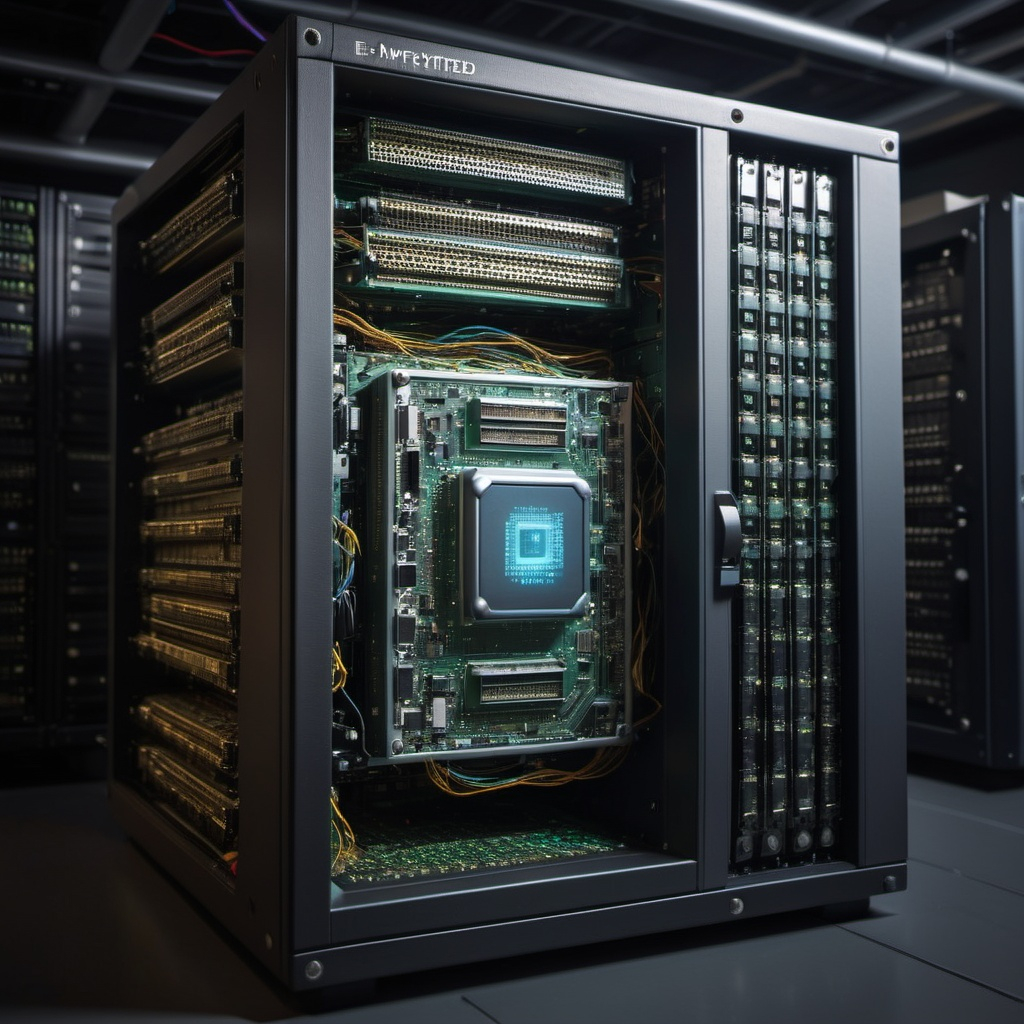

In [2]:
# Leer imagen y codificarla en Base64
with open('imagen_xor.png', 'rb') as f:
    imagen_xor = f.read()

image_b64 = base64.b64encode(imagen_xor).decode('utf-8')
image_bin = base64_to_binary(image_b64)

# Convertir la llave a binario
llave = 'cifrados_2025'
key_bin = ascii_to_binary(llave)

# Aplicar XOR
result_xor = xor(image_bin, key_bin)

# Convertir el resultado binario de nuevo a Base64
recovered_b64 = binary_to_base64(result_xor)

# Decodificar la imagen desde Base64
binary_result = base64.b64decode(recovered_b64)

# Guardar la imagen recuperada
with open("imagen_recuperada.png", "wb") as f:
    f.write(binary_result)

print("Imagen recuperada guardada correctamente.")
display(Image(filename="imagen_recuperada.png"))

## XOR de dos imágenes

*3. Investigar porque al aplicar XOR con una llave de texto la imagén se corrompe.*

Al aplicar la operación XOR entre una imagen y una llave de texto, se obtiene una versión "encriptada" de la imagen. Esto se debe a que las imágenes digitales están compuestas de una secuencia de bits que representan colores y pixeles, por lo que el resultado de la operación XOR de esta secuencia con una llave de texto es un conjunto de datos aparentemente aleatorio. Sin embargo, la operación XOR no hace más que producir una nueva secuencia al comparar cada bit correspondiente entre ambas secuencias secuencias originales. La operación XOR de dos bits correspondientes en las secuencias resulta en un "1" si estos son diferentes, de lo contrario resulta en un "0".

Una de las propiedades de la operación XOR es que si se aplica la operación dos veces con la misma llave, se recupera la secuencia original; es decir:

**(A ⊕ B) ⊕ B = A**

Esto significa que si se tiene la secuencia de bits de una imagen I y se le aplica la operación XOR con la secuencia de bits de una llave de texto K, se obtiene la secuencia de bits de una imagen ecriptada I':

I' = I ⊕ K

Luego, es posible recuperar la secuencia de bits de la imagen original I al aplicar la operación XOR entre la secuencia de bits de la imagen encriptada I' y la secuencia de bits de la llave de texto:

I = I' ⊕ K

Dado que los datos de la imagen y la llave de texto son incompatibles, la imagen encriptada resultante estará corrupta. Es decir, la secuencia de bits resultante no corresponderán a colores o pixeles válidos, por lo que no será posible visualizarse como una imagen ordinaria.

Además, es importante tener en cuenta que los siguientes problemas, podrían llevar a la pérdida de información de la imagen original al realizar el proceso de encriptación:

- **La secuencia de bits de la imagen y la secuencia de bits de la llave son diferentes:** Para poder aplicar correctamente la operación XOR, la imagen y la llave de texto deben tener una secuencia de bits de igual longitud. Si la llave es más corta que la imagen, se debe repetir la llave varias veces para abarcar toda la imagen, de lo contrario, la imagen encriptada no será el resultado esperado.

- **Se desconoce la llave con la que se encriptó la imagen:** La operación XOR es reversible solo si se conocen ambos operandos originales. Si se aplica XOR con una llave de texto y luego se intenta revertir la operación sin conocer exactamente la llave utilizada, la información original de la imagen se perderá.

Ravi et al. (2023)

*4.	Investigar como aplicar un xor a 2 imágenes. Para esto deben de eleccionar 2 imágenes, luego proceder hacer un xor entre las dos imágenes. Esto significa que una imagen es la original y la otra se utilizará como llave para aplicar el xor. Mostrar las imágenes utilizadas y el resultado, asi mismo explique que inconvenientes encontro al momento de realizar el xor.*

Prompt realizado a GPT-4o: ¿Cómo puedo aplicar XOR entre dos imágenes utilizando las librerías de NumPy y Pillow?

Para aplicar la operación XOR entre dos imágenes en Python, se deben realizar los siguientes pasos:
- Cargar las imágenes con Pillow (*Image.open()*) y asegurarse que sean del mismo tamaño con *resize()*.
- Las imágenes pueden convertirse a escala de grises con *convert("l")* para simplificar el proceso.
- Convertir las imágenes a matrices de NumPy con *np.array()*.
- Aplicar *bitwise_xor()*, la cual realiza un **XOR bit a bit** entre cada pixel de las imágenes.
- Convertir la matriz resultante del XOR en una imagen utilizando *Image.fromarray()*.
- Finalmente, guardar la imagen o mostrarla utilizando Matplotlib.

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

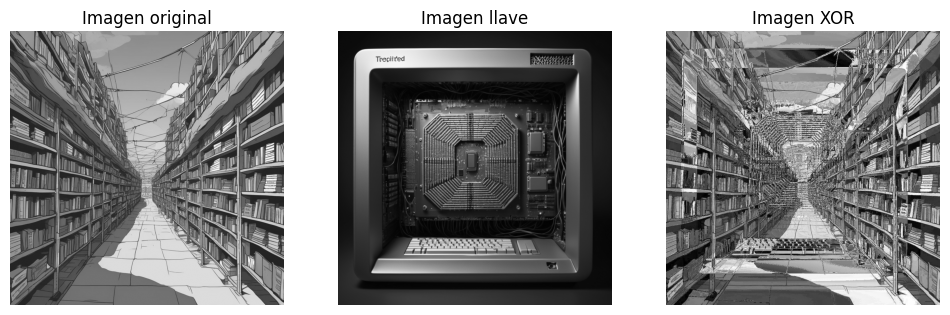

In [4]:
# EN ESCALA DE GRISES
# Cargar imágenes y asegurarse de que tengan el mismo tamaño
img1 = Image.open("imagen1.jpg").convert("L")  # Convertir a escala de grises
img2 = Image.open("imagen2.jpg").convert("L")

# Redimensionar la segunda imagen para que coincida con la primera
img2 = img2.resize(img1.size)

# Convertir imágenes a matrices NumPy
arr1 = np.array(img1)
arr2 = np.array(img2)

# Aplicar XOR bit a bit
xor_result = np.bitwise_xor(arr1, arr2)

# Convertir el resultado a imagen
xor_image = Image.fromarray(xor_result)

# Guardar imagen resultante
xor_image.save("imagen_merge_grayscale.png")

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(img1, cmap="gray")
axs[0].set_title("Imagen original")
axs[0].axis("off")

axs[1].imshow(img2, cmap="gray")
axs[1].set_title("Imagen llave")
axs[1].axis("off")

axs[2].imshow(xor_image, cmap="gray")
axs[2].set_title("Imagen XOR")
axs[2].axis("off")

plt.show()

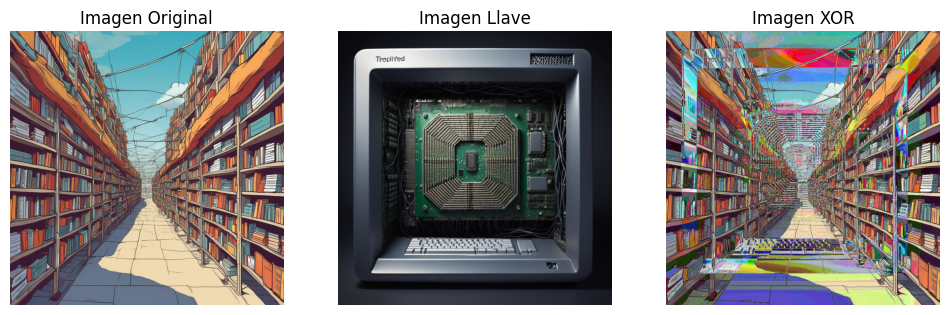

In [5]:
# EN RGB

# Cargar imágenes en modo RGB
img1 = Image.open("imagen1.jpg").convert("RGB")
img2 = Image.open("imagen2.jpg").convert("RGB")

# Redimensionar la segunda imagen para que coincida con la primera
img2 = img2.resize(img1.size)

# Convertir imágenes a matrices NumPy
arr1 = np.array(img1)
arr2 = np.array(img2)

# Aplicar XOR a cada canal de color por separado
xor_result = np.bitwise_xor(arr1, arr2)

# Convertir el resultado a imagen
xor_image = Image.fromarray(xor_result)

# Guardar imagen resultante
xor_image.save("imagen_merge_rgb.png")

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(img1)
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(img2)
axs[1].set_title("Imagen Llave")
axs[1].axis("off")

axs[2].imshow(xor_image)
axs[2].set_title("Imagen XOR")
axs[2].axis("off")

plt.show()

### Referencias
Ravi, J., Bhavana, R., Rohith, P. R., Kiran, P. S., & Priyanka, P. S. (2023). Image Encryption and Decryption Algorithm using XOR Operator. *International Journal of Advanced Research in Science, Communication and Technology (IJARSCT)*, 3(1), 236-245. https://doi.org/10.48175/568

Este laboratorio fue realizado con la ayuda de GPT-4o: https://chatgpt.com/share/67aeb0ed-d740-800e-b778-dbd27daaa288